In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Enter the Reservoir Pressure(psia): 3000
Enter the first testing pressure(psia): 2000
Enter the tested flowrate at first testing pressure(stb/day): 500
Enter the second testing pressure(psia): 1000
Enter the tested flowrate at second testing pressure(stb/day): 800
   Pressures  flowrates_vogel  flowrates_Fetkovich
0          0       978.260870                900.0
1        500       923.913043                875.0
2       1000       826.086957                800.0
3       1500       684.782609                675.0
4       2000       500.000000                500.0
5       2500       271.739130                275.0
6       3000         0.000000                  0.0


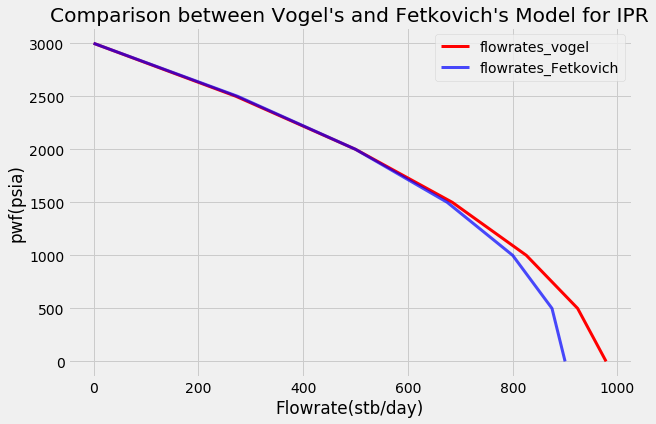

In [10]:
Pr = float(input("Enter the Reservoir Pressure(psia): "))
Pwf1 = float(input("Enter the first testing pressure(psia): "))
q1 = float(input("Enter the tested flowrate at first testing pressure(stb/day): "))
Pwf2 = float(input("Enter the second testing pressure(psia): "))
q2 = float(input("Enter the tested flowrate at second testing pressure(stb/day): "))
##Vogel Calculations-
qmax = float(q1/(1-0.2*(Pwf1/Pr)-0.8*(Pwf1/Pr)**2))
Pressures = np.arange(0,3500,500)
flowrate_vogel = []
for i in Pressures:
    q = qmax*(1-0.2*(i/Pr)-0.8*((i/Pr)**2))
    flowrate_vogel.append(q)
flowrates_vogel = np.array(flowrate_vogel)
##Fetkovich calculation_
n = np.log10(q1/q2)/(np.log10((Pr**2-Pwf1**2)/(Pr**2-Pwf2**2)))
C = q1/((Pr**2-Pwf1**2)**n)
flowrate_Fetkovich = []
for j in Pressures:
    Q = float(C*((Pr**2-j**2)**n))
    flowrate_Fetkovich.append(Q)
flowrates_Fetkovich =np.array(flowrate_Fetkovich)
##Dataframe and Plotting
flowrates_Fetkovich = pd.Series(flowrate_Fetkovich)
flowrates_vogel = pd.Series(flowrate_vogel)
Pressure = pd.Series(Pressures)
df = pd.DataFrame()
df["Pressures"] = Pressure
df["flowrates_vogel"] =flowrates_vogel
df["flowrates_Fetkovich"] = flowrates_Fetkovich
flowrate = df[["flowrates_vogel","flowrates_Fetkovich"]]
plt.figure(figsize = (9,6))
plt.style.use('fivethirtyeight')
plt.plot(flowrates_vogel,Pressures, c = "red",linewidth=3)
plt.plot(flowrates_Fetkovich,Pressures,c= "blue" ,alpha = 0.7,linewidth=3)
plt.xlabel("Flowrate(stb/day)")
plt.ylabel("pwf(psia)")
plt.grid(True)
plt.legend(flowrate, loc = "best")
plt.title("Comparison between Vogel's and Fetkovich's Model for IPR")
print(df)